# 分类算法的预测指标

## 1. 准确率

分类算法中的输出结果是离散的变量，比如二分类中分类预测结果只有0和1，那么表示模型的好坏程度，可以通过计算正确预测的样本数量与总样本数量的比值来表达，这个就是我们通常说的准确率。

准确率的表达式：$$accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$
其中
TP: 预测为正样本，实际为正样本；

FP: 预测为正样本，实际为负样本；

TN: 预测为负样本，实际为负样本；

FN: 预测为负样本，实际为正样本；

那么 $TP+TN$ 表示的就是预测正确的样本数量（包括预测正确的正负样本数量），$TP+FP+TN+FN$ 表示的是总样本数量。

In [2]:
from sklearn.metrics import accuracy_score

# 定义一组数据，计算准确率
y = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
pred_y = [1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
score = accuracy_score(y, pred_y)
print("准确率：%.2f" %score)

准确率：0.80


In [3]:
# 定义另外一组数据，正负样本不平衡，如果指定模型都输出1，那么可以达到80%的准确率，这个模型是好的吗？
y = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
pred_y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
score = accuracy_score(y, pred_y)
print("准确率：%.2f" %score)

准确率：0.80


两组试验的准确率都是0.8，第一组样本正负样例均衡，第二组不均衡。单纯从分数来看，两组预测结果都是比较不错的。但是从实际数据分析，第二组数据中，明显对正样例的预测都是错误的，那么可以理解这个0.8是水分很大的。

所以，准确率不适用于正负样例不平衡的样本。

## 2. 精准率，召回率

针对正负不均衡的样本集合，精准率和召回率是合适的评价指标。

精准率是正确预测正样例在预测正样例中的占比。表达式：
$$precision = \frac{TP}{TP+FP}$$

召回率是正确预测正样例在全部正样例中的占比。表达式：
$$recall = \frac{TP}{TP+FN}$$


In [4]:
from sklearn.metrics import precision_score, recall_score

# 数据1
y = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
pred_y = [0, 0, 1, 1, 0, 1, 1, 1, 0, 1]

accuracy = accuracy_score(y, pred_y)
precision = precision_score(y, pred_y)
recall = recall_score(y, pred_y)

print("数据1, 准确率：%.2f, 精准率：%.2f, 召回率：%.2f" %(accuracy, precision, recall))

# 数据2
pred_y = [1, 0, 1, 1, 0, 1, 1, 1, 0, 0]

accuracy = accuracy_score(y, pred_y)
precision = precision_score(y, pred_y)
recall = recall_score(y, pred_y)

print("数据2, 准确率：%.2f, 精准率：%.2f, 召回率：%.2f" %(accuracy, precision, recall))

# 数据3
pred_y = [1, 0, 1, 0, 0, 0, 0, 1, 0, 0]

accuracy = accuracy_score(y, pred_y)
precision = precision_score(y, pred_y)
recall = recall_score(y, pred_y)

print("数据3, 准确率：%.2f, 精准率：%.2f, 召回率：%.2f" %(accuracy, precision, recall))

# 数据4
pred_y = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

accuracy = accuracy_score(y, pred_y)
precision = precision_score(y, pred_y)
recall = recall_score(y, pred_y)

print("数据4, 准确率：%.2f, 精准率：%.2f, 召回率：%.2f" %(accuracy, precision, recall))

数据1, 准确率：0.20, 精准率：0.00, 召回率：0.00
数据2, 准确率：0.40, 精准率：0.17, 召回率：0.50
数据3, 准确率：0.70, 精准率：0.33, 召回率：0.50
数据4, 准确率：0.80, 精准率：0.50, 召回率：0.50


从上面的试验可以看出来，当样本正负比例不均衡的时候，准确率一直在提高，但是正样例的预测能力却一直没有提升，他在描述模型整体的能力上出现了偏向，偏向于描述占比重的样例的预测能力。

如果要准确地描述模型在比例失衡的样本上的分类能力，那么应该根据不同的业务场景来关注不同的指标。

例子1：大A股，涨跌的次数就是严重失衡的，所以称为“牛短熊长”。如果预测大盘涨跌，应该关注的就是预测的准不准。比如预测了10次，其中预测3次涨，实际情况是只涨了1次，那么这个时候的精准率$P = \frac{1}{3}$，意思就是只需要关注涨的时候，预测对了没，就是关注精准率。

例子2: 癌症检测，患有癌症的毕竟是少数，所以样本的比例也会失衡。在这个预测中，我们关注的点应该是患者实际上得病了，但是没有被检测出来的情况，这种情况是比较糟糕的。那么召回率表示的是正样例中被检测出来的比例，同时也可以反映正样例中没有被检测出来的比例。

## F1-score

F1-score评价指标同时参考了精准率和召回率，认为他们两个是同样重要的。

类似的指标:

1. F2-score：召回率的重要程度是精确率的2倍

2. F0.5-score：召回率的重要程度是精确率的一半

F1-score的表达式：
$$f1-score = 2 \times \frac{precision \times recall}{precision + recall}$$

In [5]:
from sklearn.metrics import f1_score

# 定义一组数据，计算准确率
y = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
pred_y = [1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
score = f1_score(y, pred_y)
print("f1-score: %.2f" %score)

f1-score: 0.83


## Precision Recall Curve - PR曲线

PR曲线是反应精准率和召回率变化的曲线，recall为横坐标，precision为纵坐标。

当PR曲线A完全包含PR曲线B的时候，A代表的模型要优于B代表的模型。

![分类指标-PR曲线](images/分类指标-PR曲线.png)



In [6]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 定义一组数据，计算准确率
y = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
pred_y = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
precision, recall, thresholds = precision_recall_curve(y, pred_y)
plt.plot(recall, precision)
plt.show()

<Figure size 640x480 with 1 Axes>

## ROC曲线

ROC曲线与PR曲线类似，只不过是横纵坐标变化了，ROC的横坐标为FPR(假正率)，纵坐标为TPR(真正率)。

FPR假正率：预测为正实际为负的样本，在实际负样本中的占比。
$$FPR = \frac{FP}{TN + FP}$$

TPR真正率：预测为正实际为正的样本，在实际正样本中的占比。TPR真正率其实就是召回率。
$$TPR = \frac{TP}{FN + TP}$$

通一组样本进行预测得到的结果，一般是一组概率P，取值0~1。假设一个阈值T，当P>T时，分类为1；当P<T时，分类为0。不同的阈值T，可以得到不同的预测分类结果，也就是计算出不同的FPR和TPR。多组FPR, TPR作为横纵坐标，画出的曲线就是ROC曲线。

[2 1 0]


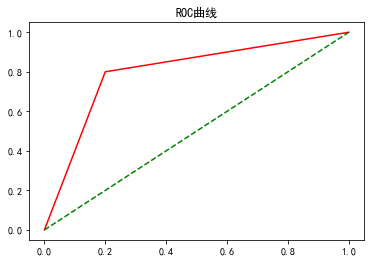

In [11]:
from sklearn.metrics import roc_curve

# 定义一组数据，计算准确率
y = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
pred_y = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
FPR, TPR, thresholds = roc_curve(y, pred_y)

print(thresholds)
# 画图
plt.title('ROC曲线')
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.plot(FPR, TPR, color='red')
plt.plot([0, 1], [0, 1], color='green', linestyle='dashed')
plt.show()

## AUC

AUC指的是ROC曲线和坐标轴下方的面积，取值<1。

当TPR = FPR的时候，面积刚好是0.5，ROC刚好是上图中绿色的直线，模型的预测能力和随机模型一致；

当TPR > FPR的时候，模型的预测能力会变好；

当TPR < FPR的时候，模型基本没有预测能力。

## KS曲线

KS曲线是常用的金融风控评价指标，横坐标是阈值，纵坐标是TPR和FPR的差值，所描述的是不同的阈值情况下，TPR和FPR的差值情况。

差值太大的时候，模型会有过拟合的风险。

用KS表示差值，那么：

1. KS < 0.2, 模型一般没有区分能力；

2. 0.2 < KS < 0.3, 模型的区分能力一般；

3. 0.3 < KS < 0.5, 模型的区分能力优秀；

4. KS > 0.75, 模型可能存在过拟合。

[0.  0.6 0. ]


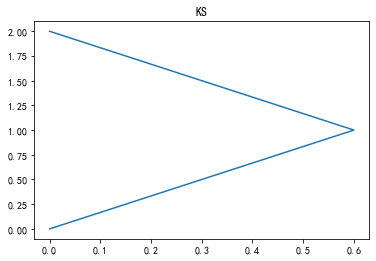

In [14]:
from sklearn.metrics import roc_curve
import numpy as np

# 定义一组数据，计算准确率
y = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
pred_y = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
FPR, TPR, thresholds = roc_curve(y, pred_y)

KS = TPR - FPR
print(KS)

plt.title('KS曲线')
plt.plot(KS, thresholds)
plt.show()